   # TP de Méthodes Numériques : 
   # Simulation d'une chaîne d'oscillateurs non linéaires

On considère un système de $n$ oscillateurs couplés, régi par une
équation différentielle du second ordre dans $\mathbb{R}^n$ :
\begin{equation}
\frac{d^2u}{dt^2}+C\, \frac{du}{dt}=f(u) \quad (1)
\end{equation}
avec $u(t)= (u_1(t), u_2(t), \ldots , u_n(t))^T \in \mathbb{R}^n$, 
$f\, : \mathbb{R}^n \rightarrow \mathbb{R}^n$ fonction de classe $C^2$ et
$$
C\in M_n(\mathbb{R}) \ \ 
\mbox{symétrique définie positive.}
$$
Nous allons simuler numériquement des équations de la forme (1) à l'aide du schéma
aux différences finies centré implicite
\begin{equation}
\frac{u^{(k+1)}-2u^{(k)}+u^{(k-1)}}{h^2}+C\, \frac{u^{(k+1)}-u^{(k-1)}}{2\, h}=f(u^{(k)})
\quad (2)
\end{equation}
où $h>0$ est le pas de discrétisation et $u^{(k)}$ une approximation de $u(k\, h)$.

En introduisant la variable auxiliaire 
$$
v=\frac{du}{dt}+C\, u,
$$
l'équation différentielle du second ordre (1) est équivalente à celle du premier ordre dans $\mathbb{R}^n \times \mathbb{R}^n$
\begin{equation}
\left\{
\begin{array}{lll}
u'&=& v-C\, u, \\
v' &=& f(u),
\end{array}
\right.
\quad (3)
\end{equation}
pour laquelle nous donnerons une reformulation du schéma (2).

Les schémas numériques mis en oeuvre nous permettront 
d'étudier la convergence de différents systèmes vers un état d'équilibre
et certains phénomènes transitoires. 
Une solution d'équilibre $u^\ast \in \mathbb{R}^n$ de (1) est une solution indépendante de $t$,
caractérisée par la propriété $f(u^\ast)=0$. De manière équivalente, une 
solution d'équilibre $(u^\ast , v^\ast) \in \mathbb{R}^n \times \mathbb{R}^n$ de (3)
est caractérisée par
$$
f(u^\ast)=0, \quad v^\ast = C\, u^\ast.
$$

## 1. Reformulation et étude du schéma centré

Etant donné une condition initiale 
$$
(u(0),v(0)) = 
(u^{(0)},v^{(0)}),
$$
on souhaite calculer numériquement $(u(t),v(t))$ pour $t \in [0,T]$.
On approche $(u(kh),v(kh))$ par la solution $(u^{(k)},v^{(k)})$ du schéma suivant
\begin{equation}
\forall k\geq 0, \quad 
\left\{
\begin{array}{lllr}
v^{(k+1/2)}&=&v^{(k)}+\frac{h}{2}\, f(u^{(k)}) & (a) \\
u^{(k+1)}&=&u^{(k)}+h\, v^{(k+1/2)} -h\, C\,  \frac{u^{(k+1)}+u^{(k)}}{2} & (b)\\
v^{(k+1)}&=&v^{(k+1/2)}+\frac{h}{2}\, f(u^{(k+1)}). & (c)
\end{array}
\right.
\quad (4)
\end{equation}
A chaque itération, il est nécessaire de résoudre l'équation (4)-(b) pour $u^{(k+1)}$, qui correspond au système linéaire
$$
A\, u^{(k+1)} = \big(I-\frac{h}{2}\, C\big)\, u^{(k)}+h\, v^{(k+1/2)}
$$
de matrice symétrique définie positive
$$
A=I+\frac{h}{2}\, C. \quad (5)
$$

#### Question 1 
Montrer que la condition initiale et la
relation de récurrence (4) déterminent la suite $(u^{(k)},v^{(k)})_{k \geq 0}$.

Réponse : $\\$
Pour $n \in \mathbb N $ on note $ P(n):$ "$u^{(n)}$ et $v^{(n)}$ sont bien déterminés" $\\$
$ P(0)$ vrai par les conditions initailes. $\\$
Soit $n \in \mathbb N$ tel que $ P(n) $ soit vrai.$\\$
Alors,
\begin{align}
u^{(n+1)}&=\frac {2}{2+hC}(u^{(n)}+h\, v^{(n)}+\frac{h^{2}}{2}\, f(u^{(n)}) -h\, C\,  \frac{u^{(n)}}{2}) \nonumber \\
v^{(n+1)}=&v^{(n)}+\frac{h}{2}\, f(u^{(n)})+\frac{h}{2}\, f(\frac {2}{2+hC}(u^{(n)}+h\, v^{(n)}+\frac{h^{2}}{2}\, f(u^{(n)}) -h\, C\,  \frac{u^{(n)}}{2})). \nonumber
\end{align}
Ainsi, $ P(n+1) $ est vrai et par réccurence, la condition initiale et la
relation de récurrence (4) déterminent la suite $(u^{(k)},v^{(k)})_{k \geq 0}$.

On notera $\varphi\, : \big(\mathbb{R}^n \big)^2 \rightarrow \big(\mathbb{R}^n \big)^2$ 
l'application définie par (4)
$$(u^{(k)},v^{(k)}) \mapsto \varphi (u^{(k)},v^{(k)})= (u^{(k+1)},v^{(k+1)}).$$

#### Question 2 
Montrer que toute solution de (4) vérifie (2) pour tout $k\geq 1$.

Réponse : $\\$
Soit la suite $(u^{(k)},v^{(k)})_{k \geq 0}$ solution de (4). $\\$
Soit $k \geq 1. \\$
\begin{align}
u^{(k+1)}&= u^{(k)}+hv^{(k)}+\frac{h^2}{2}\, f(u^{(k)}) -h\, C\,  \frac{u^{(k+1)}+u^{(k)}}{2} \nonumber \\
\llap{Donc, \qquad} u^{(k+1)} - u^{(k)}&= u^{(k)}-u^{(k-1)}+h(v^{(k)}-v^{(k-1)})+\frac{h^2}{2}\, (f(u^{(k)})-f(u^{(k-1)})) -h\, C\,  \frac{u^{(k+1)}-u^{(k-1)}}{2} \nonumber \\
\llap{De plus, \qquad} v^{(k)}-v^{(k-1)} &= \frac{h}{2}\, (f(u^{(k)})+f(u^{(k-1)})) \nonumber \\
u^{(k+1)} -2\, u^{(k)} + u^{(k-1)}&= h^2\, f(u^{(k)}) -h\, C\,  \frac{u^{(k+1)}-u^{(k-1)}}{2} \nonumber \\
\llap{Finalement, \qquad} f(u^{(k)}) &= \frac{u^{(k+1)}-2u^{(k)}+u^{(k-1)}}{h^2}+C\, \frac{u^{(k+1)}-u^{(k-1)}}{2\, h} \nonumber \\
\end{align}
En conclusion, toute solution de (4) vérifie (2) pour tout $k\geq 1$

#### Question 3
Vérifier que les points fixes de $\varphi$ sont les équilibres $(u^\ast , v^\ast)$ de (3).

Réponse : $\\$
Soit $(u^\ast , v^\ast)$ un point fixes de $\varphi$. $\\$
\begin {align}
\llap{Alors, \qquad} u^{*} &= u^{*}+hv^{*}+\frac{h^2}{2}\, f(u^{*}) -h\, C\,  \frac{u^{*}+u^{*}}{2} \nonumber \\
\llap{Donc, \qquad} v^{*}&=C\,  u^{*} + \frac{h}{2}\, f(u^{*}) \nonumber \\
\llap{Comme, pout tout } k \in \mathbb N \qquad f(u^{(k+1)}) &= \frac{u^{(k+2)}-2u^{(k+1)}+u^{(k)}}{h^2}+C\, \frac{u^{(k+2)}-u^{(k)}}{2\, h} \nonumber \\
\llap{Alors, \qquad} f(u^{*}) &= \frac{u^{*}-2u^{*}+u^{*}}{h^2}+C\, \frac{u^{*}-u^{*}}{2\, h}=0 \nonumber \\
\llap{Finalement, \qquad} f(u^\ast) & =0, \quad v^\ast = C\, u^\ast \nonumber \\
\end{align}
Soit $(u^\ast , v^\ast)$ équilibre de (3). $\\$
Alors, $u^\ast$ ne dépend pas du temps et $(u^\ast) '=0 \\$
De même, $(v^\ast) '= (u^\ast) ''+C (u^\ast)'=   0 \\$
Ainsi, $(u^\ast , v^\ast)$ est un point fixe de $\varphi. \\$
Finalement, les points fixes de $\varphi$ sont les équilibres $(u^\ast , v^\ast)$ de (3).

#### Question 4
Déterminer l'ordre de consistance du schéma (4).

Réponse : 
$\\$
On pose:
$\\$
$\begin{array}{ccccc}
\phi & : & \mathbb R \times \mathbb R^n \times \mathbb R & \to & \mathbb R ^n \\
 & & (t, u(t), h) & \mapsto & v(t)+\frac{h}{2}\, f(u(t)) -C\,  \frac{u(t+h)+u(t)}{2} \\
\end{array}$
\begin{align}
\forall (t, u(t), h) \in \mathbb R \times \mathbb R^n \times \mathbb R, \phi((t, u(t), h))&= u'(t)+Cu(t)+\frac{h}{2}\, (u''(t)+Cu'(t)) -C\,  \frac{u(t+h)+u(t)}{2} \nonumber \\
&=\frac{h}{2}\, u''(t)+ (1+\frac{hC}{2})\, u'(t) -C\,  \frac{u(t+h)-u(t)}{2} \nonumber \\
\end{align}
Déterminons l'odre de consistance de (4):
\begin{align}
    \forall t,h \in \mathbb R, \phi((t, u(t), h))-\frac{u(t+h)-u(t)}{h}= \frac{h}{2}\, u''(t)+ (1+\frac{hC}{2})\, u'(t) -(\frac{C}{2}+\frac{1}{h} )\,  (u(t+h)-u(t)) \nonumber \\
\end{align}
Comme f est $C^2$, $u$ est $C^3$ et d'après la formule de Taylor-Young:
$$ \forall t,h \in \mathbb R, u(t+h)-u(t)=hu'(t)+\frac{h^2}{2}u''(t)+O(h^3) $$
Ainsi,
\begin{align}
\forall t,h \in \mathbb R, \phi((t, u(t), h))-\frac{u(t+h)-u(t)}{h}&= \frac{h}{2}\, u''(t)+ (1+\frac{hC}{2})\, u'(t) -(\frac{C}{2}+\frac{1}{h} )\,(hu'(t)+\frac{h^2}{2}u''(t)+O(h^3))\nonumber \\
&=-\frac{C}{4}h^2u''(t)+O(h^2) )\nonumber\\
&=O(h^2))\nonumber
\end{align}
Le schéma (4) est donc consistant d'ordre 2.

#### Question 5
On admet que lorsque $f$ est lipschitzienne sur $\mathbb{R}^n$,
le schéma (4) est stable par rapport aux erreurs sur l'intervalle $[0,T]$.
Justifier dans ce cas la convergence du schéma (4) lorsque $h\rightarrow 0$ et donner son ordre de convergence.

Réponse : $\\$
Le schéma (4) est donc stable et consistant. On en déduit qu'il est convergent. De plus, étant consistant d'ordre 2, il est convergent d'ordre 2.

## 2. Test du schéma pour un oscillateur linéaire

On considère l'équation (1) pour $u(t) \in \mathbb{R}$, $C>0$ et 
$$f(u)=1-u.$$
Ce système décrit par exemple le déplacement d'un ressort linéaire amorti soumis à une force constante unitaire.
Les solutions $u(t)$ de (1) peuvent être calculées explicitement dans ce cas (l'équation est linéaire non homogène à coefficients constants). Ce calcul permet de tester le schéma (4) avant de l'appliquer aux exemples plus complexes étudiés dans les sections 3 et 4.

#### Question 6
Calculer la solution d'équilibre $(u^\ast , v^\ast)$ de (3).

Réponse :  $\\$
Une solution d'équilibre $(u^\ast , v^\ast)$ de (3) est caractérisée par $f(u^\ast) =0$ et $ v^\ast = C\, u^\ast$. $\\$
On en déduit $u^\ast=1$ et $v^\ast = C$.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

#### Question 7
Ecrire une fonction **iter** qui calcule la solution $[u^{(k+1)},v^{(k+1)}]$ de (4)
en fonction des arguments $[u^{(k)}$, $v^{(k)}]$ et $h$.
Pour des valeurs de votre choix de $C$ et $h$,
tester cette fonction sur le vecteur $[u^{(k)}$, $v^{(k)}]=[u^{\ast}$, $v^{\ast}]$.

In [2]:
def f(u):
    return 1-u
 
C=0.3

def iter(sol_k, h):
    global C
    u_k=sol_k[0]
    v_k=sol_k[1]
    u_kp1= 2/(2+h*C)*(u_k+h*v_k+h**2/2*f(u_k)-h*C/2*u_k)
    v_kp1=v_k+h/2*f(u_k)+h/2*f(u_kp1)
    return [u_kp1, v_kp1]

#test
for i in range(1, 10):
    print(iter([1, 0.3], 1/i**2))


[1.0000000000000002, 0.2999999999999999]
[0.9999999999999998, 0.30000000000000004]
[1.0000000000000002, 0.3]
[1.0000000000000002, 0.3]
[1.0, 0.3]
[1.0, 0.3]
[1.0000000000000002, 0.3]
[0.9999999999999998, 0.3]
[1.0000000000000002, 0.3]


#### Question 8
Ecrire une fonction **solnum** (prenant en arguments
la condition initiale $[u(0),v(0)]$, le temps maximal d'intégration $T$ et le pas $h$)
qui calcule la solution numérique $[u^{(k)},v^{(k)}]$
aux temps $t_k = k\, h \in [0,T]$, c'est à dire jusqu'à l'itéré 
$k_{\mathrm{max}}=\mathrm{E}(T/h)$ où $\mathrm{E}$ désigne la partie entière.
La fonction fournit en sortie
les valeurs de $[u^{(k)},v^{(k)}]$ pour $0 \leq k \leq k_{\mathrm{max}}$
sous la forme d'une matrice de taille $2 \times (k_{\mathrm{max}}+1)$.
Pour des valeurs de votre choix de $C$, $T$ et $h$,
tester cette fonction sur la condition initiale $[u(0), v(0)]=[u^{\ast}, v^{\ast}]$.

In [3]:
def solnum(sol_0, T, h):
    sol=[sol_0]
    for _ in range(int(T/h)):
        sol.append(iter(sol[-1], h))
    return sol

#test
sol=solnum([1, 0.3], 9, 1)
print(sol)

[[1, 0.3], [1.0000000000000002, 0.2999999999999999], [1.0, 0.29999999999999977], [1.0, 0.29999999999999977], [1.0, 0.29999999999999977], [1.0, 0.29999999999999977], [1.0, 0.29999999999999977], [1.0, 0.29999999999999977], [1.0, 0.29999999999999977], [1.0, 0.29999999999999977]]


Dans les questions 9 à 11, on fixe $C=0.3$ et
on suppose le système initialement au repos :
$$
u(0)=0, \quad u^\prime (0)=0, \quad (6)
$$
et donc $v(0)=0$.

#### Question 9
Calculer la solution explicite $(u(t),v(t))$ de (3) pour cette condition initiale.
Que vaut $\lim_{t\rightarrow +\infty}(u(t),v(t))$ ?
Ecrire une fonction **solexacte** prenant en argument un vecteur de temps $[t_k ]_{0\leq k \leq k_{\mathrm{max}}}$,
qui évalue cette solution aux temps $t_k$ en stockant les valeurs dans
une matrice de taille $2 \times (k_{\mathrm{max}}+1)$. 

Réponse (calcul explicite) : $\\$
Déterminons la solution du problème de Cauchy: $\\$
$\forall t \in \mathbb R,u''(t)+0.3\, u'(t) +u(t)=1 \\$
$u(0)=0, \quad u^\prime (0)=0 \\$
On trouve d'abord les racines du polynome associé: $\\$
$X^2+0.3X+1=0 \\$
Son discriminant est $\Delta=-3.91 \\$
Ses racines sont donc $X_1=\frac{-0.3+i \sqrt 3.91}{2}  $ et $X_2=\frac{-0.3-i \sqrt 3.91}{2} \\$
L'ensemble des solutions de l'équation différentielle homogène associée est $\{ \begin{array}{ccccc}
\ & \mathbb R  \to & \mathbb R  \\
  & t & \mapsto & (\lambda_1 \cos(\frac {\sqrt3.91}{2}  t) + \lambda_2 \sin(\frac {\sqrt3.91}{2}t))e^{-0.15t}  \\
\end{array} ; \lambda_1 , \lambda_2 \in \mathbb R     \} \\$
1 est solution évidente.
On cherche donc $\lambda_1 , \lambda_2 \in \mathbb R$ tels que 
\begin{equation}
\left\{
\begin{array}{lll}
\lambda_1 + 1=0 \\
\lambda_2\frac {\sqrt3.91}{2}-0.15\lambda_1=0
\end{array}
\right.
\quad
\nonumber
\end{equation}
On en déduit $\lambda_1=-1$ et $\lambda_2=-\frac {0.3}{\sqrt3.91} \\$
Ainsi, pout tout $t \in \mathbb R$, $u(t)=(-\cos(\frac {\sqrt3.91}{2}  t) -\frac {0.3}{\sqrt3.91} \sin(\frac {\sqrt3.91}{2}t))e^{-0.15t}+1 \\$
pout tout $t \in \mathbb R$,
\begin{align}
v(t)&= u'(t)+0.3u(t) \nonumber \\
&= 0.15(-\cos(\frac {\sqrt3.91}{2}  t) -\frac {0.3}{\sqrt3.91} \sin(\frac {\sqrt3.91}{2}t))e^{-0.15t}+(\frac {\sqrt3.91}{2}\sin(\frac {\sqrt3.91}{2}  t) -0.15\cos(\frac {\sqrt3.91}{2}t))e^{-0.15t}+0.3 \nonumber \\
&=0.15(-2\cos(\frac {\sqrt3.91}{2}  t)+(\frac {\sqrt3.91}{0.3}-\frac {0.3}{\sqrt3.91}) \sin(\frac {\sqrt3.91}{2}t))e^{-0.15t}+0.3 \nonumber \\
\end{align}
On a $\lim_{t\rightarrow +\infty}(u(t),v(t))=(1, 0.3)=(u^*, v^*)$ par somme et par prduit de fonctions bornées par des fonctions qui tendent vers 0.


In [4]:
def u(t):
    c=np.sqrt(3.91)
    return 1+np.exp(-0.15*t)*(-np.cos(c/2*t)-0.3/c*np.sin(c/2*t))

def v(t):
    c=np.sqrt(3.91)
    return 0.3+0.15*np.exp(-0.15*t)*(-2*np.cos(c/2*t)+(c/0.3-0.3/c)*np.sin(c/2*t))

def solexacte(temps):
    return [[u(t), v(t)] for t in temps]

#### Question 10
On fixe $T=25$. Tracer le graphe de l'erreur globale
$$\mathrm{Err}\,(h)=\mathrm{max}_{0\leq k \leq k_{\mathrm{max}}}\| (u^{(k)},v^{(k)})-(u(t_k),v(t_k)) \|_2$$
pour $h \in [10^{-5}, 10^{-1}]$ en utilisant une échelle logarithmique.
Retrouvez-vous l'ordre de convergence obtenu dans la question 5 ?

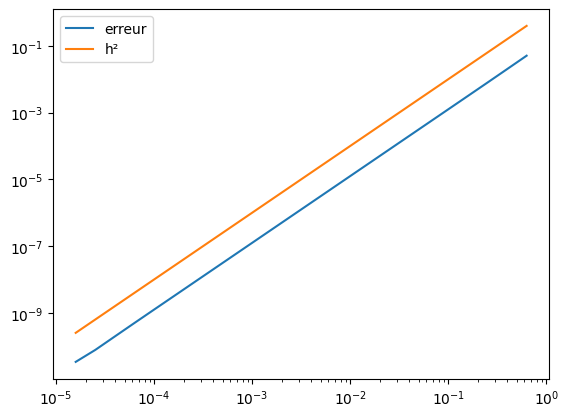

In [5]:
def err(h):
    T=25
    t=np.linspace(0, h*int(T/h), int(T/h)+1)
    num=solnum([0, 0], T, h)
    exct=solexacte(t)
    cur_max=np.sqrt((num[0][0]-exct[0][0])**2+(num[0][1]-exct[0][1])**2)
    for i in range(len(t)):
        cur_max=max(cur_max, np.sqrt((num[i][0]-exct[i][0])**2+(num[i][1]-exct[i][1])**2))
    return cur_max

pas=[10**(-i*0.2) for i in range(1, 25)]
errs=[err(h) for h in pas]
plt.plot(pas, errs, label="erreur")
plt.plot(pas, [h**2 for h in pas], label="h²") 
#on retrouve l'ordre 2:
#En effet les courbes de l'érreur et de la fonction carré sont deux droites colinéaires en échelle logarithmique:
#∃b∈R, ln(Err(h))=ln(h**2)+b donc Err(h)=e^b.h²=O(h²)
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()


#### Question 11
Etudier numériquement pour quelles valeurs de $h >0$ on a 
$\lim_{k\rightarrow +\infty}{(u^{(k)},v^{(k)})}=\lim_{t\rightarrow +\infty}(u(t),v(t))$.
Pour cela, on pourra afficher pour différentes valeurs de $h$, et sur des intervalles de temps $[0,T]$ bien choisis,
les graphes de $u^{(k)}$ et $v^{(k)}$ en fonction de $t_k$.

In [6]:
#le temps caractérique de u est τ=1/0.15. A 3τ=20, le régime stationnaire est presque atteint
u_graph = plt.figure()
u_ax = u_graph.add_subplot(111)
u_ax.set_title("Représentation graphique de u")

v_graph = plt.figure()
v_ax = v_graph.add_subplot(111)
v_ax.set_title("Représentation graphique de v")

T=20
h=2
t=np.linspace(0, h*int(T/h), int(T/h)+1)
num=solnum([0, 0], T, h)
u=[sol[0] for sol in num]
v=[sol[1] for sol in num]

while abs(u[-1]-1)>0.01 or abs(v[-1]-0.3)>0.003: #erreur de 1%
    u_ax.plot(t, u, label=f"u, C={C/5}")
    u_ax.legend()
    v_ax.plot(t, v, label=f"v, C={C/5}")
    v_ax.legend()
    h=h/1.5
    t=np.linspace(0, h*int(T/h), int(T/h)+1)
    num=solnum([0, 0], T, h)
    u=[sol[0] for sol in num]
    v=[sol[1] for sol in num]
    
plt.show()

## 3. Oscillateur non linéaire soumis à une force constante

On considère l'équation (1) pour $u(t) \in \mathbb{R}$, $C>0$ et 
$$f(u)=1-u^3.$$
Ce système décrit le déplacement d'un ressort non-linéaire (non-linéarité cubique)
avec amortissement linéaire, sous l'action d'une force constante unitaire.

#### Question 12
Calculer la solution d'équilibre $(u^\ast , v^\ast)$ de (3).

Réponse :  $\\$
Une solution d'équilibre $(u^\ast , v^\ast)$ de (3) est caractérisée par $f(u^\ast) =0$ et $ v^\ast = C\, u^\ast$. $\\$
On en déduit $u^\ast=1$ et $v^\ast = C$.

#### Question 13
Pour un oscillateur initialement au repos (condition initiale (6)),
on calcule numériquement la solution de (3) sur l'intervalle de temps $[0,T]$ 
en utilisant le schéma (4). On choisit $T=30$ et le pas de temps $h=10^{-3}$.
Pour différentes valeurs de $C$, tracer les graphes de $u^{(k)}$ et $v^{(k)}$ en fonction de $t_k$.
Etudier numériquement pour quelles valeurs de $C$ la convergence vers l'équilibre s'effectue
de manière monotone (régime sur-amorti), et pour quelles valeurs du paramètre cette convergence est oscillante (régime sous-amorti).

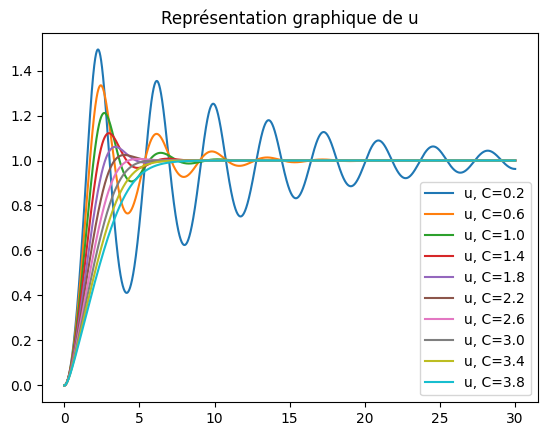

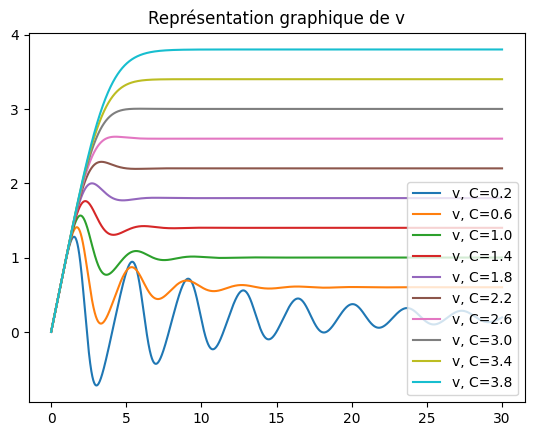

In [37]:
def f_2(u):
    return 1-u**3

def iter_2(sol_k, h, C):
    u_k=sol_k[0]
    v_k=sol_k[1]
    u_kp1= 2/(2+h*C)*(u_k+h*v_k+h**2/2*f_2(u_k)-h*C/2*u_k)
    v_kp1=v_k+h/2*f_2(u_k)+h/2*f_2(u_kp1)
    return [u_kp1, v_kp1]

def solnum_2(sol_0, T, h, C):
    sol=[sol_0]
    for _ in range(int(T/h)):
        sol.append(iter_2(sol[-1], h, C))
    return sol

u_graph = plt.figure()
u_ax = u_graph.add_subplot(111)
u_ax.set_title("Représentation graphique de u")

v_graph = plt.figure()
v_ax = v_graph.add_subplot(111)
v_ax.set_title("Représentation graphique de v")

T = 30
h = 10**-3
t = np.linspace(0, h*int(T/h), int(T/h)+1)

for C in range(1, 20, 2):X
    sol = solnum_2([0, 0], T, h, C/5)
    u = [s[0] for s in sol]
    v = [s[1] for s in sol]
    u_ax.plot(t, u, label=f"u, C={C/5}")
    u_ax.legend()
    v_ax.plot(t, v, label=f"v, C={C/5}")
    v_ax.legend()

#Il semble que lorsque C<0.3, l'équilibre s'effectue de manière monotone. Sinon, la convergence est oscillante.
plt.show()




## 4. Chaîne d'oscillateurs non linéaires forcée à une extrémité

On étudie l'équation (1) avec $C=\mu\, K$ où
$\mu >0$ est un paramètre 
et la matrice $K\in M_n (\mathbb{R})$ ($n \geq 2$) s'écrit:
$$
K =\left(
\begin{array}{cccccc}
 2  & -1 & 0 & 0 & \ldots & 0 \\
 -1 & 2  & -1 & 0 & & \vdots \\
0 & -1 & 2  & -1 & \ddots & \vdots \\
\vdots & 0 & -1 & \ddots & \ddots & 0 \\
\vdots & & \ddots & \ddots & 2 & -1 \\
0 & \ldots & \ldots & 0 & -1 & 1 
\end{array} \right).
$$
On fixe par ailleurs
$$
f(u)= -K\, u^3 + e_1 \quad (7)
$$
où $e_1 = (1,0,0,\ldots , 0)^T$ est le premier vecteur de la base canonique de $\mathbb{R}^n$
et on note
$$
u^3=(u_1^3, u_2^3, \ldots , u_n^3)^T.
$$
Ce système décrit une chaîne de $n$ oscillateurs non linéaires cubiques
(du même type que dans la section 3) couplés à leurs proches voisins.
Une extrémité de la chaîne est soumise à une force constante unitaire, l'autre
extrémité étant fixe.

#### Question 14
Montrer que la matrice $K$ est symétrique définie positive.

Réponse : 

#### Question 15
Montrer que l'équation (3) admet une unique solution d'équilibre $(u^\ast , v^\ast) \in \mathbb{R}^n \times \mathbb{R}^n$ qu'on calculera explicitement.

Réponse : 

On veut approcher numériquement la solution $(u(t),v(t))$
de (3) pour une condition initiale $(u(0),v(0))$ donnée et $t \in [0,T]$
en utilisant le schéma (4).

#### Question 16
Définir une fonction **fvec** qui à un vecteur $u$ associe le vecteur $f(u)$ défini par (7).
Tester cette fonction sur le vecteur $u^\ast$.

#### Question 17
Ecrire une fonction **factorise** (prenant en arguments $n$, $\mu$ et $h$) qui calcule
la factorisation $A = L\, U = L\, D\, L^t$ de la matrice tridiagonale symétrique définie positive $A$ définie par (5).
On rappelle que $L$ et $D$ sont de la forme
$$
L =\left(
\begin{array}{cccccc}
 1  & 0 & 0 & 0 & \ldots & 0 \\
 l_0 & 1  & 0 & 0 & & \vdots \\
0 & l_1 & 1  & 0 & \ddots & \vdots \\
\vdots & 0 & l_2 & \ddots & \ddots & 0 \\
\vdots & & \ddots & \ddots & \ddots & 0 \\
0 & \ldots & \ldots & 0 & l_{n-2} & 1 
\end{array} \right), \quad
D =\left(
\begin{array}{cccccc}
 d_0  & 0 & 0 & 0 & \ldots & 0 \\
 0 & d_1  & 0 & 0 & & \vdots \\
0 & 0 & d_2  & 0 & \ddots & \vdots \\
\vdots & 0 & 0 & \ddots & \ddots & 0 \\
\vdots & & \ddots & \ddots & \ddots & 0 \\
0 & \ldots & \ldots & 0 & 0 & d_{n-1} 
\end{array} \right)
$$
avec $d_{i}>0$.
La fonction fournit en sortie deux vecteurs contenant 
les coefficients sous-diagonaux de $L$ et diagonaux de $D$.
Tester cette fonction pour des valeurs de votre choix de $n$, $\mu$ et $h$.

#### Question 18

Ecrire une fonction **solchaine**
(prenant en arguments la condition initiale $(u(0),v(0))$, le temps maximal d'intégration $T$ et le pas $h$)
qui calcule la solution numérique $(u^{(k)},v^{(k)})$ aux temps $t_k = k\, h \in [0,T]$.
La fonction fournit en sortie
les valeurs de $u^{(k)}$, $v^{(k)}$ pour $0 \leq k \leq k_{\mathrm{max}}$
sous la forme de deux matrices de taille $n \times (k_{\mathrm{max}}+1)$ 
$$
[u^{(0)},u^{(1)},\ldots , u^{(k_{\mathrm{max}})}], \quad
[v^{(0)},v^{(1)},\ldots , v^{(k_{\mathrm{max}})}].
$$
La factorisation $A=L\, D\, L^t$ est calculée avant de démarrer les itérations (4), puis
à chaque itération on résout l'équation (4)-(b) par simple descente/remontée.
Tester cette fonction sur la condition initiale $[u(0), v(0)]=[u^{\ast}, v^{\ast}]$
pour des valeurs de votre choix de $n$, $\mu$, $T$ et $h$.

Dans les questions 19 et 20, on simule le système (1) pour la condition initiale (6) correspondant à la chaîne au repos.
On note $u_{\mathrm{app}}(j,t_k)$ l'approximation numérique de la solution $u_j(t_k)$ de (1)-(6),
et $u^\prime_{\mathrm{app}}(j,t_k)$ celle de $u_j^\prime(t_k)$. On a donc
$$
u^\prime_{\mathrm{app}}(.,t_k) = v^{(k)}-\mu\, K\, u^{(k)}.
$$

#### Question 19
On choisit comme pas d'intégration $h=10^{-3}$.
Pour $n=5$ et $\mu = 0.5$, calculer la solution numérique de (1)-(6) sur un intervalle $[0,T]$ bien choisi et
tracer les graphes de $u_{\mathrm{app}}(j,t)$ et $u^\prime_{\mathrm{app}}(j,t)$ en fonction de $t$
pour $j=1,3,5$ (i.e. pour les oscillateurs situés en début, milieu et fin de chaîne).
Quel est l'ordre de grandeur du temps $t_{\mathrm{eq}}$ nécessaire pour atteindre un état proche de l'équilibre ?
On pourra fixer comme critère
$\| u(t)-u^\ast \|_\infty < 10^{-3}$ pour tout $t \geq t_{\mathrm{eq}}$.
Comparer ce temps à celui observé pour $n=1$ (modèle étudié dans la section 3 avec $C=0.5$).

#### Question 20

Calculer $u_{\mathrm{app}}$ pour $n=100$ et $\mu = 5$, en fixant
$T=2500$ et $h=10^{-2}$.
Décrire les différents phénomènes qu'on peut observer 
avant que le système atteigne un état voisin de l'équilibre.
Pour étayer votre analyse, afficher un échantillon de graphes bien choisis :

-graphes des 
fonctions $t \mapsto u_{\mathrm{app}}(j,t)$ à différents noeuds $j$,

-graphe de $j \mapsto u_{\mathrm{app}}(j,t)$ à différents temps $t$,

-graphe animé de $j \mapsto u_{\mathrm{app}}(j,t)$ lorsque 
$t$ décrit l'intervalle $[0,T]$, en utilisant 
la fonction **FuncAnimation()** du module animation de Matplotlib.

In [ ]:
# Enable interactive plot
%matplotlib notebook